# Unit 5 - Financial Planning


In [56]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [57]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [58]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [59]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [60]:
import json

# Fetch current BTC price
btc_data = requests.get(btc_url).json()
#print(json.dumps(btc_data, indent=4))
btc_price = btc_data['data']["1"]['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
#print(json.dumps(eth_data, indent=4))
eth_price = eth_data['data']["1027"]['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")

The current value of your 1.2 BTC is $13,657.73
The current value of your 5.3 ETH is $1,996.51


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [61]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [62]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [63]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
2020-10-13 00:00:00-04:00  118.01  118.07  117.9294  118.01  3250338  352.28   

                                                               
                               high     low   close    volume  
2020-10-13 00:00:00-04:00  352.4651  349.09  350.15  62272512

In [64]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio.iloc[0]['AGG']['close']
spy_close_price = df_portfolio.iloc[0]['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.01
Current SPY closing price: $350.15


In [65]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $17,507.50
The current value of your 200 AGG shares is $23,602.00


### Savings Health Analysis

In [66]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [(my_btc_value+my_eth_value), (my_spy_value+my_agg_value)]}, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,15654.238
shares,41109.500


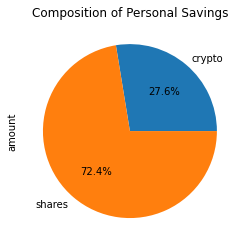

In [67]:
# Plot savings pie chart
df_savings.plot(y=0, kind='pie', title="Composition of Personal Savings", legend=False, autopct='%1.1f%%')

In [68]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = my_spy_value + my_agg_value

# Validate saving health
if savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif savings == emergency_fund:
    print("Congratulations! You have reached this financial goal.")
else:
    print(f"You are ${(emergency_fund - savings):0,.2f} away from reaching this goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [87]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-13', tz='America/New_York').isoformat()

In [88]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-13 00:00:00-04:00  109.62  109.7500  109.4900  109.63  1360561.0   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942.0   

                              SPY                                    
                             open    high     low   close    volume  
2015-10-13 00:00:00-04:00  200.65  202.16  200.05  200.22  72076783  
2015-10-14 00:00:00-04:00  200.18  200.87  198.94  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.64  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.92  203.14  79323870  
2015-10-19 00:00:00-04:00  202.50  203.37  202.13  203.33  61255929

In [89]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [90]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-13 00:00:00-04:00  109.62  109.7500  109.4900  109.63  1360561.0   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-13 00:00:00-04:00          NaN  200.65  202.16  200.05  200.22   
2015-10-14 00:00:00-04:00     0.003649  200.18  200.87  198.94  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.64  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.92  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.13  203.33   

                                                  
                             volume daily_return  
2015-10-13 00:00:00-04:00  72076783          NaN  
2015-10-14 00:00:00-04:00  82856686    -0.004745  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935

In [91]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007085,0.986338,1.000339,1.006202,1.011303,1.003329,1.005155,1.004326,0.996763,1.004670,...,0.990230,0.998765,1.008171,0.994744,1.000963,0.997533,1.000029,0.990100,1.006098,0.990256
2,1.007162,0.973942,0.990874,1.013959,1.019124,1.016784,1.012697,1.004200,0.992193,1.002064,...,0.998888,0.998067,1.008900,0.994320,0.998327,0.988484,0.998064,0.981943,1.002702,0.996671
3,1.007589,0.969685,0.992423,1.015623,1.022026,1.037820,1.001369,1.012380,0.983549,0.994411,...,0.999100,0.998824,1.007471,0.988738,0.995809,0.984530,1.017801,0.988810,1.003699,0.986694
4,1.003879,0.980963,0.992770,1.017691,1.040497,1.047458,0.998427,1.017770,0.989254,1.014927,...,0.994000,0.990238,0.999711,0.992250,0.987345,0.974819,1.022931,0.978890,1.004333,0.987259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.741805,6.774555,39.006014,13.370812,5.639411,12.545217,15.585693,10.939860,13.680804,3.296460,...,12.717948,5.809551,8.789336,20.149406,8.622722,7.495186,4.625378,15.256479,17.190935,11.089322
7557,6.753508,6.816858,39.067817,13.407018,5.626771,12.582200,15.481540,10.938447,13.673557,3.255788,...,12.595614,5.761709,8.740057,20.083632,8.629763,7.470170,4.578248,15.048542,17.008457,10.985498
7558,6.743763,6.840081,38.606387,13.364629,5.651110,12.652434,15.489171,11.086559,13.536930,3.245532,...,12.589492,5.812669,8.795291,19.898979,8.657884,7.433992,4.646925,15.043941,17.076131,11.158804
7559,6.748418,6.858961,38.361530,13.485015,5.584437,12.766823,15.699995,11.072085,13.770974,3.269735,...,12.600851,5.870035,8.831105,20.059814,8.629015,7.481686,4.645462,14.939564,17.023103,11.125229


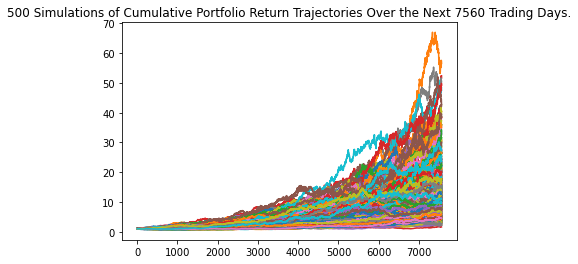

In [92]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

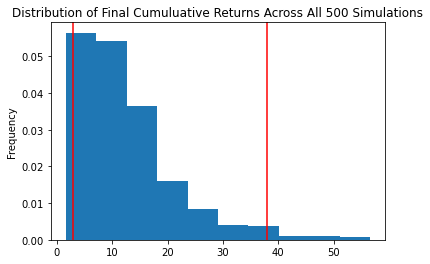

In [93]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [94]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             12.650698
std               8.901205
min               1.644618
25%               6.349357
50%              10.416097
75%              16.017112
max              56.567865
95% CI Lower      2.962651
95% CI Upper     37.943256
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [95]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $59,253.03 and $758,865.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [96]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,.2f} and ${ci_upper:0,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $88,879.54 and $1,138,297.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [97]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [98]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-13 00:00:00-04:00  109.62  109.7500  109.4900  109.63  1360561.0   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-13 00:00:00-04:00          NaN  200.65  202.16  200.05  200.22   
2015-10-14 00:00:00-04:00     0.003649  200.18  200.87  198.94  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.64  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.92  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.13  203.33   

                                                  
                             volume daily_return  
2015-10-13 00:00:00-04:00  72076783          NaN  
2015-10-14 00:00:00-04:00  82856686    -0.004745  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

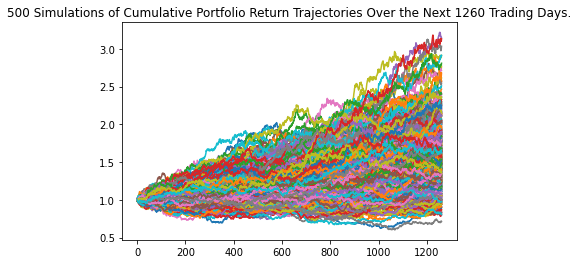

In [99]:
# Plot simulation outcomes
line_plot_five = MC_dist_five.plot_simulation()

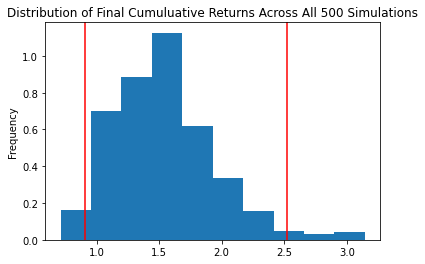

In [100]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_dist_five.plot_distribution()

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_dist_five.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.543352
std               0.410796
min               0.711532
25%               1.251391
50%               1.505671
75%               1.772503
max               3.144047
95% CI Lower      0.910056
95% CI Upper      2.523188
Name: 1260, dtype: float64


In [103]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54603.36 and $151391.26


### Ten Years Retirement Option

In [104]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [105]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008856,1.005265,0.996875,0.984853,0.989677,0.998747,1.001908,1.002044,0.989399,0.992876,...,1.009035,1.013378,0.998588,1.006927,1.005723,1.006594,1.009616,1.006154,1.007082,0.989249
2,1.000651,0.998465,0.992792,0.994756,0.989213,0.997817,1.003443,1.010430,0.992322,0.985749,...,1.012426,1.015652,1.008254,1.011712,1.000459,1.010969,1.010070,0.997342,0.998559,0.985471
3,1.010833,0.993924,0.997091,0.990750,0.986557,1.000178,0.995654,1.016353,0.985960,0.987320,...,1.015817,1.016528,1.008028,1.012603,1.003355,1.007760,1.007822,1.006343,0.998482,0.981441
4,1.013370,1.001122,0.997077,0.992173,0.993144,1.006367,0.991119,1.008911,0.979736,0.990039,...,1.011667,1.013909,1.013620,1.010392,0.997015,1.011939,0.997228,1.001105,1.002498,0.983061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.980194,1.645505,1.333125,2.295480,3.074551,1.436742,2.594056,1.593457,1.819118,3.727899,...,1.123887,1.869467,2.479738,1.442746,1.585030,2.616349,3.891493,1.037874,2.545270,3.420523
2517,1.989030,1.633455,1.318975,2.287493,3.072715,1.429373,2.607462,1.597484,1.823078,3.723466,...,1.128777,1.888095,2.483642,1.464768,1.583154,2.606347,3.903782,1.038291,2.531921,3.410497
2518,2.003215,1.624924,1.313354,2.277401,3.048990,1.438860,2.602681,1.609538,1.784378,3.733645,...,1.139713,1.871541,2.492905,1.476846,1.580187,2.584122,3.888801,1.039905,2.536981,3.434904
2519,2.011847,1.626888,1.313118,2.254417,3.045009,1.438141,2.588269,1.593928,1.792147,3.761266,...,1.134178,1.881302,2.519356,1.483503,1.602414,2.590504,3.879011,1.040161,2.524391,3.450273


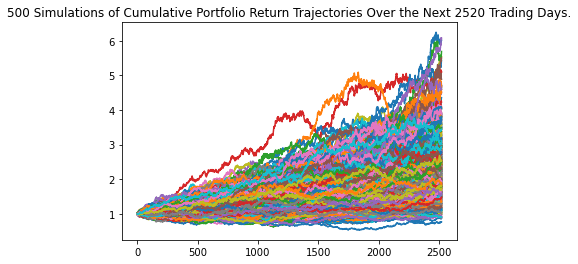

In [106]:
# Plot simulation outcomes
line_plot_ten = MC_dist_ten.plot_simulation()

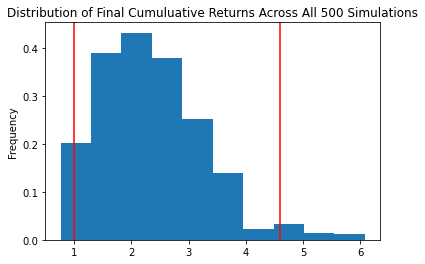

In [107]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_dist_ten.plot_distribution()

In [108]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.350106
std               0.912666
min               0.763875
25%               1.647738
50%               2.245996
75%               2.892665
max               6.078205
95% CI Lower      1.000617
95% CI Upper      4.600629
Name: 2520, dtype: float64


In [109]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $60037.03 and $276037.72
